# <font color='#31394d'>Linear Regression Practice Exercises</font>


For this exercise, we'll be using the carseats dataset that is provided as a csv file in the `data` folder.

We will attempt to predict child car seat sales (the `Sales` variable) based on a number of predictors using data from 400 different locations. The dataset includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location; that is, the space within each store in which the car seat is displayed. The predictor `Shelveloc` takes on three possible values: Bad, Medium, and Good. `US` and `Urban` are also categorical (binary) features.

🚀 <font color='#d9c4b1'> Exercise: </font> Import and examine the data. Don't forget to import the necessary packages!

In [1]:
# your code goes here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
carseats = pd.read_csv('./data/carseats.csv')


Now let's do some basic exploratory data analysis.

🚀 <font color='#d9c4b1'> Exercise: </font> Determine which columns are numerical and examine their distributions. Look for outliers. Can you see any strong relationships, particularly with the `Sales` outcome?

In [3]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
carseats_num = carseats.select_dtypes(include = ['float64', 'int64'])
carseats_num.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


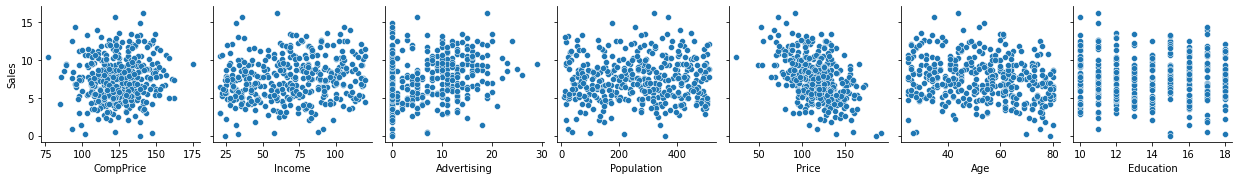

In [6]:
# relationship between numerical variables and sales
sns.pairplot(carseats_num, x_vars = carseats_num.columns[1:], y_vars = 'Sales')

In [7]:
carseats_cat = carseats.select_dtypes(include = ['object'])
carseats_cat.describe()

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


🚀 <font color='#d9c4b1'> Exercise: </font> For the categorical variables, check how many observations are in each category. How does carseat sales vary by category?

In [8]:
carseats_cat['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
carseats_cat['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [10]:
carseats_cat['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

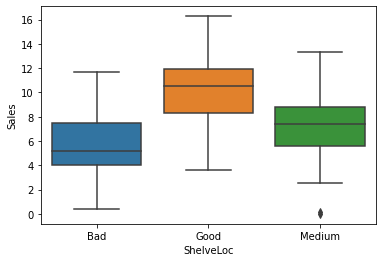

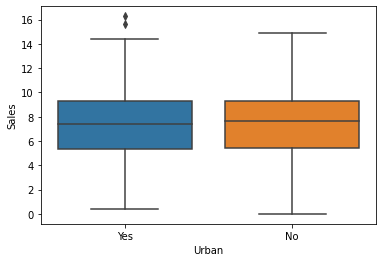

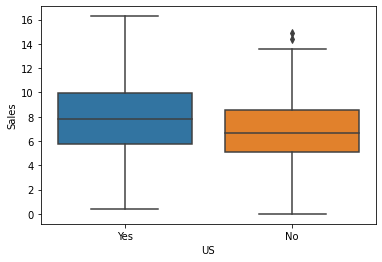

In [11]:
# analysis of how categorical features vary with Sales, plot boxplot for each categorical feature
carseats_cat.columns = ['ShelveLoc', 'Urban', 'US']
for col in carseats_cat.columns:
    sns.boxplot(x = col, y = 'Sales', data = carseats)
    plt.show()

Car sales varies with categorical variables. For example, car sales are higher in urban areas than in rural areas. Car sales are higher in the US than in Canada. Car sales are higher in good shelving locations than in bad shelving locations.

To get ready to fit a linear regression model, we must first use one-hot encoding to convert our categorical variables into dummies. Read more about one-hot encoding here! https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

🚀 <font color='#d9c4b1'> Exercise: </font> Use the `pd.get_dummies` function to do this. If you don't know how to use this function, try looking at its help page with `?pd.get_dummies`. Don't forget to choose a reference category and omit this column from the dataset.

In [12]:
?pd.get_dummies

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the co

In [13]:
carseats_cat_dummies = pd.get_dummies(carseats_cat, drop_first = True)
carseats_cat_dummies.head()

,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0,0,1,1
1,1,0,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,0


In [14]:
carseats_new = pd.concat([carseats_num, carseats_cat_dummies], axis = 1)
carseats_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [15]:
carseats_new_copy = carseats_new.copy()

Great - all the columns are now numerical! We are ready to fit our first linear regression model.

Begin by importing the `LinearRegression` class. Inspect the help to see what parameters can be set when we instantiate an object of this class and what the default arguments are:

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
?model

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\ronle\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator

Like all supervised learning methods in `sklearn`, the `model` object has a `fit` method for estimating the model parameters (using the training data) and a `predict` method for making predictions on new data (the test data).

🚀 <font color='#d9c4b1'> Exercise: </font> Train a linear model to predict `Sales` using all the other columns in this dataset; that is, estimate the $\beta$ parameters by minimising the RSS loss function on the training data. If you are not sure how to do this, try examining `?model.fit`.

In [17]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = carseats_new.drop('Sales', axis = 1)
y = carseats_new['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [18]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
237,151,28,8,499,135,48,10,0,1,1,1
268,123,57,0,66,105,39,11,0,1,1,0
186,120,51,0,93,86,46,17,0,1,0,0
106,102,33,0,217,139,70,18,0,1,0,0
41,157,53,0,403,124,58,16,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
63,119,88,10,170,101,61,13,0,1,1,1
326,133,30,0,152,122,53,17,0,1,1,0
337,130,38,0,283,102,80,15,0,1,1,0
11,117,94,4,503,94,50,13,1,0,1,1


In [19]:
# train a linear model to predict Sales using all the other columns in the dataset, estimating the Beta coefficients by minimizing the RSS (Residual Sum of Squares) loss function on the training data
model.fit(X_train, y_train)

LinearRegression()

🚀 <font color='#d9c4b1'> Exercise: </font> Interpret your regression coefficients. Do these correspond to the relationships that you discovered in your exploratory data analysis above?

In [20]:
# regression coefficients
model.coef_

array([ 9.76149565e-02,  1.64394949e-02,  1.16739198e-01,  4.91907064e-04,
       -9.79722482e-02, -4.49841442e-02, -1.24143275e-02,  4.88606381e+00,
        1.86088284e+00,  3.84913643e-03, -1.08370088e-01])

The coefficients are the same as the relationships that we discovered in our exploratory data analysis above. For example, the coefficient for `CompPrice` is 0.098, which means that for every 1 unit increase in `CompPrice`, `Sales` increases by 0.098 units. The coefficient for `Age` is -0.0038, which means that for every 1 unit increase in `Age`, `Sales` decreases by 0.0038 units.

In [21]:
model.intercept_

5.187858950304911

In [22]:
# predict Sales on the test data
y_pred = model.predict(X_test)

🚀 <font color='#d9c4b1'> Exercise: </font> Plot the actual sales versus the predicted sales. Compute the coefficient of determination ($R^2$). Does this seem like a good model?

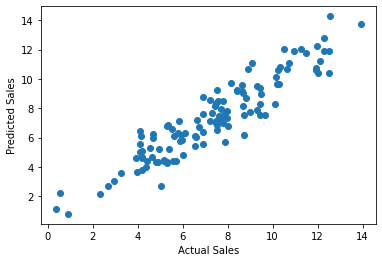

In [23]:
# plot the actual sales versus the predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

From our exploratory data analysis, we saw that only price and shelf location seem to be strongly associated with sales. All these other features might be making our model unnecessarily complex and harder to productionize.

🚀 <font color='#d9c4b1'> Exercise: </font> Use cross-validation to determine which model is best: the full model above or a simpler model that only includes price and shelf location as features.

In [24]:
# use cross-validation to determine which model is best: the full model or a simpler model that only includes price and shelf location as features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv = 10, scoring = 'neg_mean_squared_error')
scores

array([-1.38483325, -0.84862456, -1.0749575 , -0.89303622, -0.89853148,
       -0.82509986, -0.98804471, -1.10918484, -1.68662891, -0.99039556])

In [25]:
# create a model with the least negative mean squared error (MSE)
np.mean(scores)

-1.069933688163656

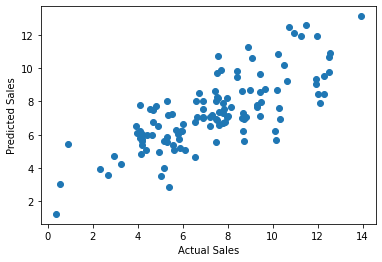

In [26]:
# create a model with only price and shelf location as features
X_new = carseats_new[['Price', 'ShelveLoc_Good', 'ShelveLoc_Medium']]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.3, random_state = 101)
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
plt.scatter(y_test_new, y_pred_new)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Let's try and improve on our simple model...

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you think that the relationship between sales and price is likely to differ depending on the shelf location. Add an interation effect to your simple model and see if it improves on model performance.

<ipython-input-27-55b589859aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Price*ShelveLoc_Good'] = X_new['Price'] * X_new['ShelveLoc_Good']
<ipython-input-27-55b589859aa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Price*ShelveLoc_Medium'] = X_new['Price'] * X_new['ShelveLoc_Medium']


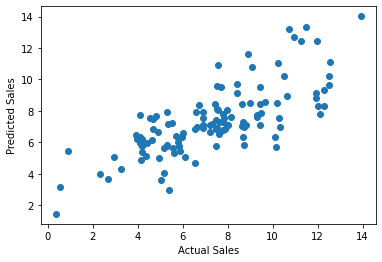

In [27]:
# relationship between price and sales is likely to differ depending on the shelf location. Add an interaction effect to the simple model and see if it improves the model fit
X_new['Price*ShelveLoc_Good'] = X_new['Price'] * X_new['ShelveLoc_Good']
X_new['Price*ShelveLoc_Medium'] = X_new['Price'] * X_new['ShelveLoc_Medium']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.3, random_state = 101)
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
plt.scatter(y_test_new, y_pred_new)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you suspect that there is a quadratic relationship between sales and price. (The exploratory analysis doesn't actually support this, but let's go ahead anyway!) Extend your simple model to include an quadratic term for price and determine if it improves model performance.

<ipython-input-28-39891233b927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Price^2'] = X_new['Price'] ** 2


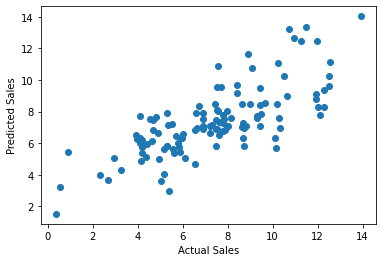

In [28]:
# there is a quadratic relationship between price and sales. Extend the simple model to include a quadratic term for price and see if it improves the model fit
X_new['Price^2'] = X_new['Price'] ** 2
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.3, random_state = 101)
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
plt.scatter(y_test_new, y_pred_new)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()